<a href="https://colab.research.google.com/github/Kavitha159/Penguin_Analysis_Python/blob/main/Penguin_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Penguin Species Analysis Using EDA**

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# import the penguin data
data = sns.load_dataset('penguins')

# data dimension
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

The data has 344 rows and 7 columns.


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [19]:
data.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [16]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [17]:
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [20]:
data.duplicated().sum()

np.int64(0)

In [4]:
# basic nature of the data
data_summary = pd.DataFrame({'missing_percent': round(data.isnull().mean()*100, 2),
                             'datatypes': data.dtypes})
# data sample
sample_data = pd.DataFrame(data.head(2).T)
# concating the dataframes
data_summary = pd.concat([data_summary, sample_data], axis=1)
# renaming the columns
data_summary.rename(columns={0: 'sample_1', 1: 'sample_2'}, inplace=True)
data_summary

,missing_percent,datatypes,sample_1,sample_2
species,0.00,object,Adelie,Adelie
island,0.00,object,Torgersen,Torgersen
bill_length_mm,0.58,float64,39.1,39.5
bill_depth_mm,0.58,float64,18.7,17.4
flipper_length_mm,0.58,float64,181.0,186.0
body_mass_g,0.58,float64,3750.0,3800.0
sex,3.20,object,Male,Female


### **Univariate Analysis**

In [5]:
# statistical summary
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


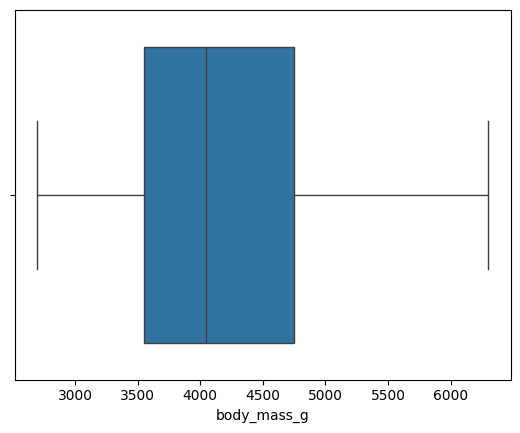

In [6]:
# outlier analysis
sns.boxplot(data['body_mass_g'], orient='h')
plt.show()

In [7]:
# Understanding the categorical columns
for cols in data.columns:
    if data[cols].dtype == 'O':
        print(cols, '-->', data[cols].unique())

species --> ['Adelie' 'Chinstrap' 'Gentoo']
island --> ['Torgersen' 'Biscoe' 'Dream']
sex --> ['Male' 'Female' nan]


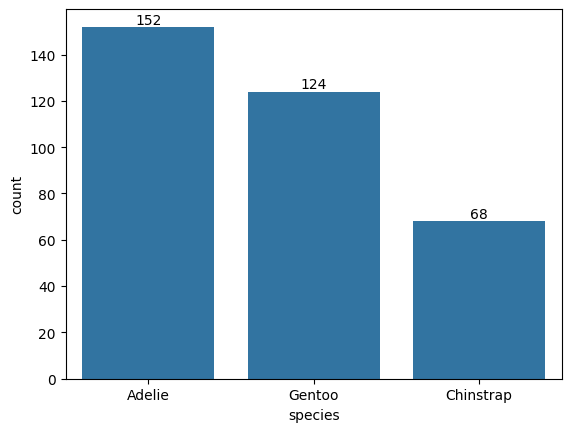

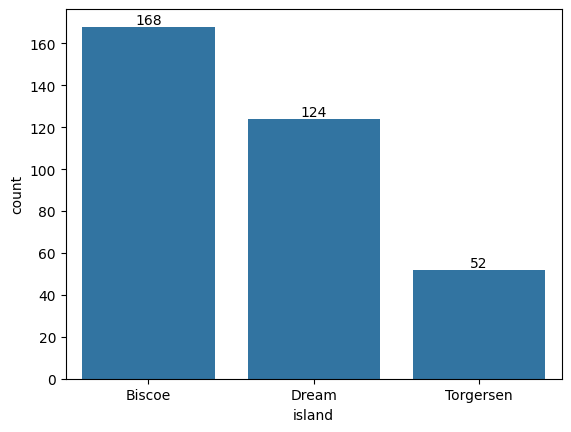

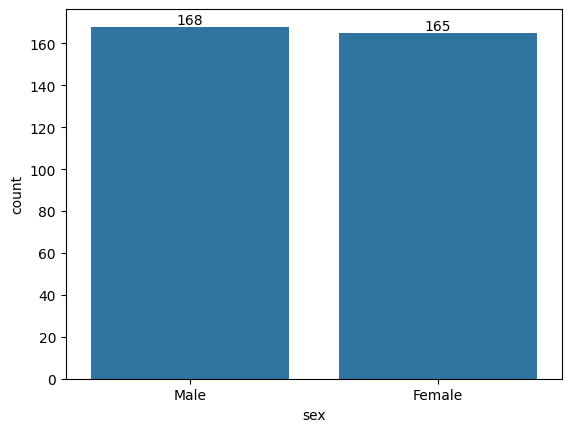

In [8]:
# analysing the cat cols in detail
for cols in data.columns:
    if data[cols].dtype == 'O':
        ax = sns.countplot(x=data[cols], order=data[cols].value_counts().index)
        ax.bar_label(ax.containers[0])
        plt.show()

Count plots were used to analyze the frequency of categories like species, island, and sex.

**🔍 Key Takeaways:**

🔹 The dataset contains three species: Adelie, Chinstrap, and Gentoo, with Adelie having the highest representation.

🔹 Not all islands have all species — for example, Chinstrap appears only on Dream island.

🔹 There are some missing values in the sex column, visible through uneven counts.



## **Bivariate Analysis**

In [10]:
# categroical columns - contingency table (crosstab)

pd.crosstab(data['species'], data['island'])


island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


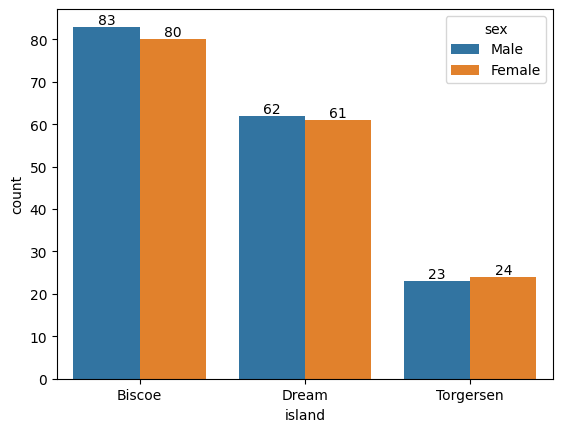

In [11]:
# stacked barchart
ax = sns.countplot(data=data, x='island', hue='sex', order=data['island'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

This chart shows the distribution of penguins by sex (Male vs. Female) across the three islands: Biscoe, Dream, and Torgersen.

**🔍 Key Takeaways:**

🔹 Biscoe Island has the highest number of penguins overall, with 83 males and 80 females, showing a nearly equal gender distribution.

🔹 Dream Island also has a balanced ratio, with 62 males and 61 females, indicating no noticeable gender skew.

🔹 Torgersen Island has the smallest penguin population, but again shows balance, with 23 males and 24 females.

**👉 Conclusion:**
Across all three islands, the male-to-female ratio is almost equal, indicating no gender bias or imbalance in the penguin population distribution by location.

## **Multivariate Analysis**

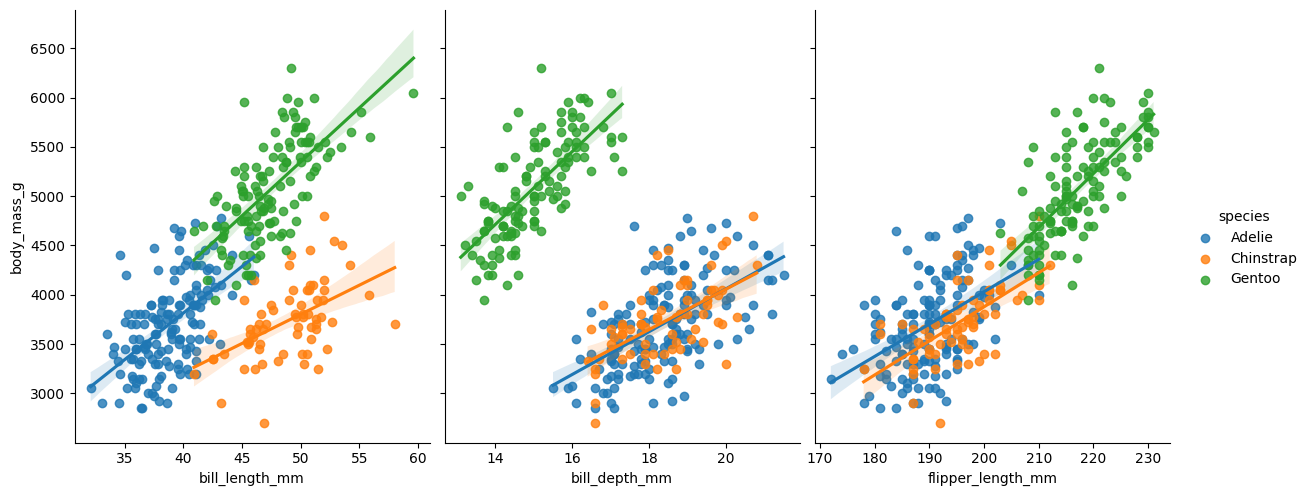

In [13]:
# multivariate of bodymass vs othr numerical columns
sns.pairplot(data=data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'], height=5, aspect=0.8, kind='reg', hue='species')
plt.show()

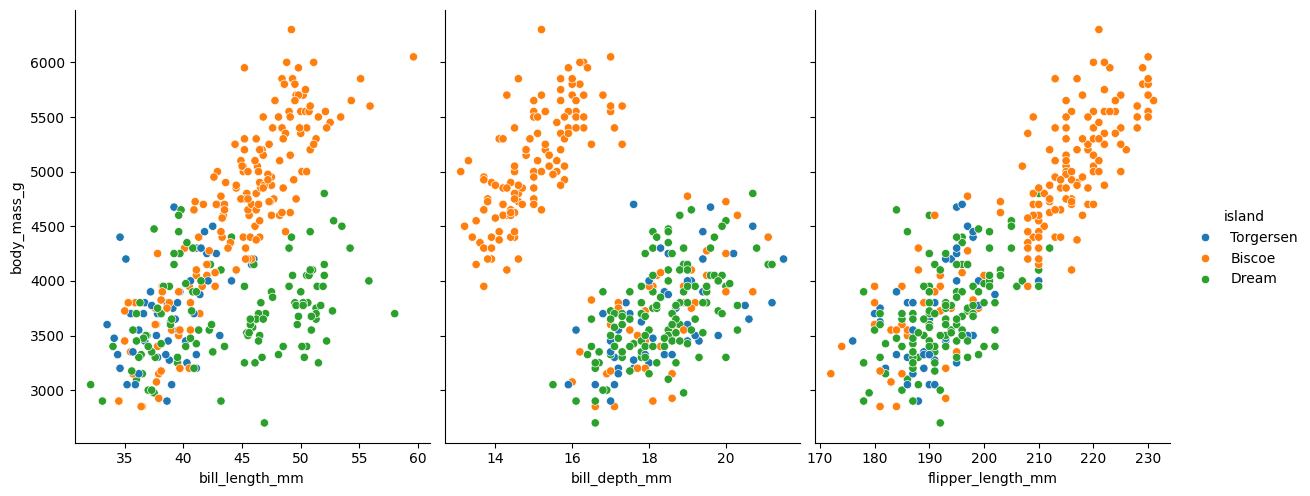

In [14]:
# multivariate of bodymass vs othr numerical columns
sns.pairplot(data=data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'], height=5, aspect=0.8, hue='island')
plt.show()

The pairplot analysis highlights how body mass relates to other numerical features — bill length, bill depth, and flipper length — when grouped by species and by island.

**🔍 Key Takeaways:**

**🔹Strong Positive Relationships:**

* Across all subplots, body mass shows a clear positive correlation with flipper length and bill length, meaning larger penguins tend to have longer flippers and bills.

**🔹Species-Based Separation:**

When the hue is set to species, the clusters become clearly distinguishable:

*   **Gentoo penguins** form a cluster with higher body mass and flipper length, making them visibly larger than the other species.

*   **Chinstrap and Adelie penguins** overlap in some measurements but still show noticeable differences in bill dimensions.

**🔹Island Patterns Reflect Species Presence:**

When the hue is switched to islands, the separation is less biological and more geographical. The island view supports the earlier findings:

* Since certain species live only on specific islands, the cluster patterns shift based on location rather than physical distinctions alone.